In [95]:
import torch, torch.nn as nn
torch.manual_seed(2333)

p = 10
mode = 3
sigma = [0.2, 0.4, 1]
ns = [100, 200, 300]
x_data = [torch.rand(ns[i], p) for i in range(mode)]
theta = torch.rand(p, 1)
y_data = [x_data[i] @ theta + torch.randn(ns[i], 1)*sigma[i] for i in range(mode)]

In [96]:
def AVELoss(y_predict, y_data):
    L = [torch.mean(torch.abs(y_predict[i] - y_data[i])**2) for i in range(len(y_data))]
    return torch.mean(torch.stack(L))


def BALoss(y_predict, y_data):
    L = [torch.sum(torch.abs(y_predict[i] - y_data[i])**2) for i in range(len(y_data))]
    return torch.sum(torch.stack(L) / torch.tensor(sigma)**2)

def MTLoss(y_predict, y_data, sigma_):
    ns = torch.tensor([len(y_data[i]) for i in range(len(y_data))])
    L = [torch.sum(torch.abs(y_predict[i] - y_data[i])**2) for i in range(len(y_data))]
    return 0.5*torch.sum(torch.stack(L) / sigma_**2) + torch.sum(torch.log(sigma_) * ns)

def LogLoss(y_predict, y_data):
    ns = torch.tensor([len(y_data[i]) for i in range(len(y_data))])
    L = [torch.mean(torch.abs(y_predict[i] - y_data[i])**2) for i in range(len(y_data))]
    return torch.sum(torch.log(torch.stack(L)) * ns )


In [97]:
net = nn.Linear(p, 1, bias=False)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
loss_func = AVELoss

l_list = []

for epoch in range(2000):
    optimizer.zero_grad()
    y_predict = [net(x) for x in x_data]
    loss = loss_func(y_predict, y_data)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(loss.item())
    l_list.append(loss.item())

torch.norm(net.weight.T - theta)


11.914078712463379
0.4809129238128662
0.42872869968414307
0.4001791775226593
0.3891858160495758
0.38597574830055237
0.3852325975894928
0.385090708732605
0.3850677013397217
0.3850645124912262


tensor(0.2378, grad_fn=<LinalgVectorNormBackward0>)

In [98]:
net = nn.Linear(p, 1, bias=False)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-1)
loss_func = BALoss

l_list = []

for epoch in range(2000):
    optimizer.zero_grad()
    y_predict = [net(x) for x in x_data]
    loss = loss_func(y_predict, y_data)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(loss.item())
    l_list.append(loss.item())

torch.norm(net.weight.T - theta)


35190.3828125
557.1519775390625
557.14990234375
557.14990234375
557.14990234375
557.14990234375
557.14990234375
557.14990234375
557.14990234375
557.14990234375


tensor(0.1529, grad_fn=<LinalgVectorNormBackward0>)

In [99]:
net = nn.Linear(p, 1, bias=False)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
loss_func = LogLoss

l_list = []

for epoch in range(2000):
    optimizer.zero_grad()
    y_predict = [net(x) for x in x_data]
    loss = loss_func(y_predict, y_data)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(loss.item())
    l_list.append(loss.item())

torch.norm(net.weight.T - theta)


1226.7705078125
-736.1932373046875
-736.3411865234375
-736.3411865234375
-736.3412475585938
-736.3411865234375
-736.3412475585938
-736.3411865234375
-736.3412475585938
-736.3411865234375


tensor(0.1607, grad_fn=<LinalgVectorNormBackward0>)

In [100]:
net = nn.Linear(p, 1, bias=False)
sigma_ = torch.tensor(torch.ones(len(sigma)), requires_grad=True)
optimizer = torch.optim.Adam([{'params': net.parameters()}, {'params': [sigma_]}], lr=1e-2)
loss_func = MTLoss

l_list = []

for epoch in range(2000):
    optimizer.zero_grad()
    y_predict = [net(x) for x in x_data]
    loss = loss_func(y_predict, y_data, sigma_)
    loss.backward()
    optimizer.step()
    if epoch % 200 == 0:
        print(loss.item())
    l_list.append(loss.item())

torch.norm(net.weight.T - theta)


/tmp/ipykernel_18055/3374745845.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma_ = torch.tensor(torch.ones(len(sigma)), requires_grad=True)


2092.86279296875
-7.1932373046875
-68.16717529296875
-68.17062377929688
-68.170654296875
-68.170654296875
-68.170654296875
-68.170654296875
-68.17062377929688
-68.17059326171875


tensor(0.1607, grad_fn=<LinalgVectorNormBackward0>)

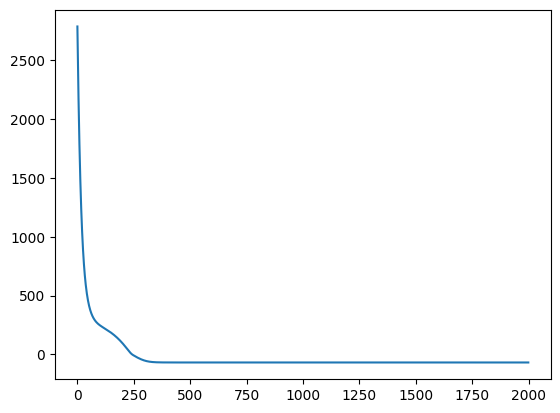

In [84]:
import matplotlib.pyplot as plt
plt.plot(l_list)